In [1]:
from util.ml_data import MLData
from util.modify_inp import qchem_out_aimd_multi
import numpy as np
'''
multi = qchem_out_aimd_multi()
multi.read_files([
    "./examples/aimd_bodipy_nvt_1.out",
    "./examples/aimd_bodipy_nvt_2.out"
])



# 转换成 kcal/mol, Angstrom, kcal/mol/Angstrom

multi.export_numpy(prefix="./examples/full_",
                   energy_unit="kcal",
                   distance_unit="ang",
                   force_unit=("kcal", "ang"))
'''



'\nmulti = qchem_out_aimd_multi()\nmulti.read_files([\n    "./examples/aimd_bodipy_nvt_1.out",\n    "./examples/aimd_bodipy_nvt_2.out"\n])\n\n\n\n# 转换成 kcal/mol, Angstrom, kcal/mol/Angstrom\n\nmulti.export_numpy(prefix="./examples/full_",\n                   energy_unit="kcal",\n                   distance_unit="ang",\n                   force_unit=("kcal", "ang"))\n'

In [2]:
# 1. 读取 (可扩展字段)
dataset = MLData(prefix="./examples/full_", files=["coord","energy","grad","type"])

# 2. 保存划分
dataset.save_split(1000, 200, 200, prefix="./examples/1000_")

# 3. 加载 split 并切片
split = np.load("./examples/1000_split.npz", allow_pickle=True)
train_data = dataset.get_split_data(split, part="idx_train")
val_data   = dataset.get_split_data(split, part="idx_val")
energies = np.load("./examples/full_energy.npy", allow_pickle=True)


Loaded dataset with 20000 frames, 31 atoms
Saved split to ./examples/1000_split.npz (idx_train=1000, idx_val=200, idx_test=200)


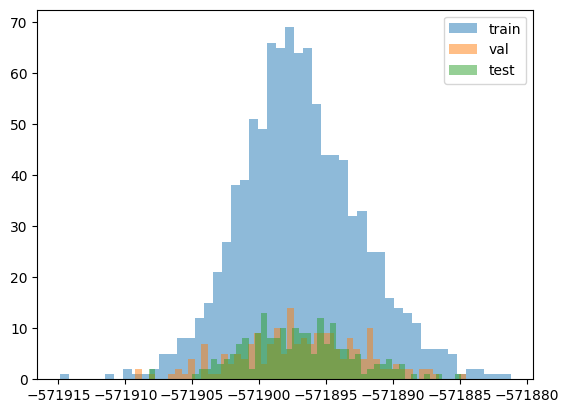

In [3]:
import matplotlib.pyplot as plt
split = np.load("./examples/1000_split.npz", allow_pickle=True)
plt.hist(energies[split["idx_train"]], bins=50, alpha=0.5, label="train")
plt.hist(energies[split["idx_val"]], bins=50, alpha=0.5, label="val")
plt.hist(energies[split["idx_test"]], bins=50, alpha=0.5, label="test")
plt.legend(); plt.show()


In [12]:
import numpy as np

# 读取原始能量
energies = np.load("./examples/full_energy.npy")

# 计算偏置（全局均值）
bias = np.mean(energies)

# 生成新能量
energies_shifted = energies - bias

# 保存新的能量文件
np.save("./examples/full_energy_shifted.npy", energies_shifted)

print(f"Bias = {bias:.6f}")
print("Before shift:", energies[:5])
print("After shift :", energies_shifted[:5])


Bias = -571897.053734
Before shift: [-571921.89624087 -571918.89378122 -571915.15067152 -571911.74053746
 -571909.35475071]
After shift : [-24.84250718 -21.84004753 -18.09693783 -14.68680376 -12.30101701]


In [13]:
e = np.load("./examples/full_energy_shifted.npy", allow_pickle=True)

In [14]:
e.min()

np.float64(-25.440273201093078)

In [15]:
e.max()

np.float64(16.938620924018323)

In [17]:
energies = np.load("./examples/full_energy.npy")

# 计算偏置（全局均值）
bias = np.mean(energies)
bias

np.float64(-571897.0537336967)

In [35]:
energies_train =  energies[split["idx_train"]]
energies_test =  energies[split["idx_test"]]

In [36]:
np.mean(energies_train),np.mean(energies_test)

(np.float64(-571899.2310356833), np.float64(-571889.6595569097))

In [46]:
energies_train.min(),energies_train.max()

(np.float64(-571922.4940068978), np.float64(-571894.7203264463))

In [47]:
energies_test.min(),energies_test.max()

(np.float64(-571892.2568602386), np.float64(-571880.1151127727))

In [33]:
np.sort(split["idx_train"])

array([   13,    31,    61,    74,    85,    86,   114,   145,   152,
         163,   211,   220,   224,   248,   255,   308,   316,   341,
         342,   380,   388,   411,   423,   424,   481,   557,   579,
         585,   596,   618,   667,   676,   716,   756,   757,   765,
         793,   965,   994,  1037,  1043,  1059,  1069,  1096,  1158,
        1195,  1198,  1217,  1221,  1225,  1251,  1260,  1261,  1292,
        1293,  1314,  1341,  1361,  1367,  1386,  1396,  1404,  1407,
        1421,  1459,  1473,  1480,  1484,  1502,  1514,  1519,  1520,
        1542,  1543,  1547,  1549,  1552,  1573,  1577,  1589,  1596,
        1600,  1621,  1623,  1626,  1648,  1663,  1704,  1720,  1722,
        1725,  1728,  1769,  1772,  1785,  1788,  1820,  1827,  1862,
        1872,  1889,  1893,  1895,  1909,  1927,  1974,  1997,  2005,
        2007,  2122,  2134,  2162,  2167,  2171,  2181,  2209,  2216,
        2218,  2219,  2233,  2234,  2269,  2284,  2377,  2395,  2417,
        2441,  2473,

In [34]:
np.sort(split["idx_test"])

array([  738,   807,   809,   831,   833,   841,   857,   919,   949,
         972,  1079,  1081,  1185,  1236,  2606,  2647,  2697,  2771,
        2815,  2816,  2830,  2912,  2914,  2921,  2925,  2955,  3086,
        3565,  3696,  4050,  4064,  4139,  4191,  4255,  4257,  4270,
        4286,  4296,  4324,  4930,  4980,  5229,  5280,  5321,  5349,
        5355,  5399,  5402,  5422,  5502,  5529,  5607,  6667,  7527,
        7622,  7624,  7645,  7647,  7670,  7755,  7774,  7799,  7835,
        7844,  7867,  7884,  7890,  7900,  7903,  7953,  7956,  7968,
        7997,  8000,  8007,  8036,  8063,  8069,  8087,  8122,  8135,
        8136,  8138,  8188,  8214,  8231,  8260,  8299,  8325,  8367,
        8383,  8506,  8513,  8672,  8752,  8770,  8823,  8882,  8906,
        9481,  9483,  9484,  9879, 11206, 11544, 11754, 11760, 11766,
       11870, 11871, 11872, 11881, 11902, 11922, 11949, 11953, 11969,
       11983, 11984, 11991, 12042, 12065, 12102, 12115, 12165, 12173,
       12177, 12249,